# Lab 10/Mini-Project 2: Exploring magnetic ordering using neutron diffraction

*Antiferromagnetism* is the phenomenon where alternate magnetic moments in a solid point in opposite directions. As a result, the solid has no magnetic moment, making this behaviour a little tricky to observe directly. (This contrasts with *ferromagnetism*, the familiar phenomenon in iron where each magnetic moment has the same direction, and therefore the solid as a whole acts as a magnet.) However, antiferromagnetism increases (often, doubles) the crystallographic unit cell size for radiation beams sensitive to magnetism, such as neutrons. As a result, characteristic peaks are produced in a neutron diffraction pattern.

This ordering typically only happens at very low temperatures, where thermal energy does not disrupt the order. Important parameters that characterise this behaviour include the *transition temperature* below which the magnetic moments order and the *critical exponent* that describes how rapidly they order.

In this mini-project, we will determine these parameters directly from neutron diffraction data collected at ISIS, the UK’s national neutron source, using the integration and curve-fitting skills from recent labs. Among the first materials to have an antiferromagnetic neutron diffraction pattern measured was manganese(II) oxide, MnO (see references below). The material from which these data were collected is actually a cobalt compound, methylammonium cobalt(II) formate (CH<sub>3</sub>NH<sub>3</sub>Co(HCO<sub>2</sub>)<sub>3</sub>) [[1](http://dx.doi.org/10.1039/C6TC03992H)].

## 1. Loading and plotting the data

You are provided with eight data sets named `data_TTTTT.txt`, where `TTTTT` represents the temperature at which the data were collected. In each data set, the first column is “$d$-spacing”, a common quantity in crystallography, measured in angstrom ($1\,\mathrm{Å}=10^{-10}\,\mathrm{m}$). (You may remember Bragg’s law, $\lambda = 2d\sin\theta$; this is the same $d$, so that it is inversely proportional to the angle $\theta$ through which the neutrons were scattered.) The second column is the diffracted intensity $I$. I have selected only the portion of the diffraction pattern that is due to magnetic scattering. 

Use the `loadtxt` command from `numpy` to **load each of these data sets. Plot them on the same axes.** (*Hint*: the `loadtxt` command will have loaded the data sets into a $N\times2$ `array`, so you will want to plot `whatever[:,0]` on the $x$ axis and `whatever[:,1]` on the $y$ axis.)

You should see that there is definitely a magnetic phase transition somewhere in the range of temperatures for which we have collected data!

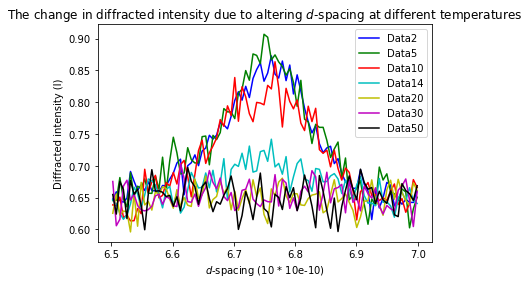

In [2]:
from numpy import loadtxt as load
from pylab import plot, legend, xlabel, ylabel, title
import numpy as np

data2, data5, data10, data14, data20, data30, data50 = load("G:\\SPA5666\\ap16178\\project2_data\\data_02.0K.txt"), load("G:\\SPA5666\\ap16178\\project2_data\\data_05.0K.txt"), load("G:\\SPA5666\\ap16178\\project2_data\\data_10.0K.txt"), load("G:\\SPA5666\\ap16178\\project2_data\\data_14.0K.txt"), load("G:\\SPA5666\\ap16178\\project2_data\\data_20.0K.txt"), load("G:\\SPA5666\\ap16178\\project2_data\\data_30.0K.txt"), load("G:\\SPA5666\\ap16178\\project2_data\\data_50.0K.txt")
plot(data2[:,0], data2[:,1], 'b-', label ='Data2')
plot(data5[:,0], data5[:,1], 'g-', label ='Data5')
plot(data10[:,0], data10[:,1], 'r-', label ='Data10')
plot(data14[:,0], data14[:,1], 'c-', label ='Data14')
plot(data20[:,0], data20[:,1], 'y-', label ='Data20')
plot(data30[:,0], data30[:,1], 'm-', label ='Data30')
plot(data50[:,0], data50[:,1], 'k-', label ='Data50')
xlabel('$d$-spacing (10 * 10e-10)')
ylabel('Diffracted intensity (I)')
title('The change in diffracted intensity due to altering $d$-spacing at different temperatures')
legend()

## 2. Integrating the data

You will see that the steps in $d$-spacing are not even, due to the particular experimental setup we used. As a result, the `trapezoid` function we have previously coded is not appropriate. However, we can still use the trapezoid method.

If you are feeling brave, code this yourself. (*Hint*: since the spacing along the $d$-axis is not constant, you will need to consider all of the $d$ values rather than just a single value of the spacing as we did in class.)

If you are not feeling so brave, use the `trapz` function from `numpy` to do this for you.

Either way, **integrate the data and plot the integrated magnetic diffraction intensity as a function of temperature.**

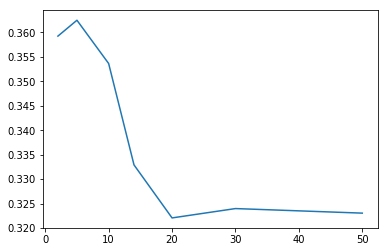

In [3]:
from numpy import trapz
x = [2, 5, 10, 14, 20, 30, 50]
y = [trapz(data2[:,1],data2[:,0]), trapz(data5[:,1],data5[:,0]), trapz(data10[:,1],data10[:,0]), trapz(data14[:,1],data14[:,0]), trapz(data20[:,1],data20[:,0]), trapz(data30[:,1],data30[:,0]), trapz(data50[:,1],data50[:,0])]
plot(x,y)

## 3. A model for the magnetic signal as a function of temperature

The usual functional form to which we fit these data is

$$
M(T) = \begin{cases}A(T_0 - T)^\beta + B & T < T_0 \\ B & T \geq T_0\end{cases}.
$$

You can see that this gives the magnetisation $M$ as a function of temperature $T$ with four parameters: the amplitude $A$ of the magnetic signal, the magnetic transition temperature $T_0$, the *critical exponent* $\beta$, and a constant background $B$.

**Code this function in Python.** (*Hint*: you will want this to work with `array`s `T`. So rather than saying

    if T < T0:
        ...
        
as you might if you were considering only a single value of `T`, use the `where` function from `numpy`. This has syntax

    where(condition, value_if_true, value_if_false)
    
so you might write

    where(T < T0, ..., ...)
    
which will work beautifully with `array`s.)

**Find suitable initial guesses for $A$, $T_0$, $\beta$, and $B$.** This is a fairly fiddly function to fit, and you will need these initial guesses to be pretty close for the fitting routine that follows to work!

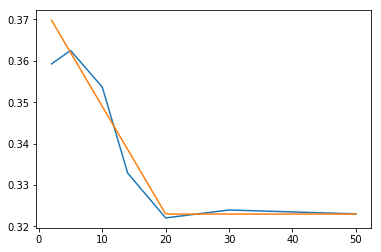

In [4]:
from numpy import where, array
def M(T, T0, A, beta, B):
    return where(T < T0, (A*(T0 - T)**beta) + B, B)
T = np.linspace(2,50,100)
plot(x,y)
plot(T, M(T ,20.0,.0026,1.0, .323))

## 4. Fitting the data

**Fit the model to the data.** One way of doing this is to use the code that we developed in Lab 9. You will need to define a suitable function `g`; the remaining functions `CD`, `jacobian`, and `nD_Newton_step` should be able to be used essentially unchanged. Of course you may want to experiment with changing them!

An alternative method, once again, is to use the built-in fitting functions. If you want to explore these I recommend starting with `curve_fit`, from the `scipy.optimize` module.

**Plot your fit and check it looks sensible.** What is the magnetic transition temperature? What is the critical exponent $\beta$? What would you expect the intensity of the magnetic peak to be at 0 K?

In [5]:
from scipy.optimize import curve_fit
import numpy as np
x =np.array([2, 5, 10, 14, 20, 30, 50])
y= np.array(y)

def g(T, T0, A, beta, B, data):
    """Represents the vector function g derived from a Lorentzian for nonlinear least-squares fitting."""
    d, I = data
    g1 = np.sum(where(T < T0,(beta * A *(T0 - T)**(beta - 1)),0))
    g2 = np.sum(where(T < T0,(T0 - T)**beta,0))
    g3 = np.sum(where(T < T0,(A*np.log(T0 - T) * (T0 - T)**beta),0))
    g4 = 0
    return g1, g2, g3, g4

def CD(f, x0, h):
    """Returns the derivative of f at x0 evaluated using the central difference algorithm with step size h."""
    return (f(x0 + h/2) - f(x0 - h/2))/np.linalg.norm(h)

def jacobian(g, param, data):
    """Returns the Jacobian matrix of g evaluated at param, given observed data."""
    p = np.array(param)
    delta = 1e-6
    N = len(param)
    jac = np.zeros((N,N))
    
    for i in range(N):
        def g_i(x):
            return g(x, T0, A, beta, B, data)[i]
        for j in range(N):
            dv = np.zeros(N)
            dv[j] = delta
            jac[i,j] = CD(g_i, p, dv)      
    return jac

def nD_Newton_step(g, p, data):
    return p - np.linalg.solve(jacobian(g, p, data), g(T, T0, A, beta, B, data))

T = np.linspace(0,50,100)
p0 = (T ,20.0,.0026,1.0, .323)
T = np.linspace(2,50,100)
eps = 1e-7
converged = False
while not converged:
    p1 = nD_Newton_step(g, p0, (x, y))
    if np.linalg.norm(p1 - p0) < eps:
        converged = True
        print(p1)
    else:
        p0 = p1

plt.plot(x,y)
plt.plot(np.linspace(0,50,100),g(np.linspace(0,50,100),p1)) #So confused #So confused

NameError: name 'T0' is not defined

In [7]:
from scipy.optimize import curve_fit
import numpy as np
y = np.array([trapz(data2[:,1],data2[:,0]), trapz(data5[:,1],data5[:,0]), trapz(data10[:,1],data10[:,0]), trapz(data14[:,1],data14[:,0]), trapz(data20[:,1],data20[:,0]), trapz(data30[:,1],data30[:,0]), trapz(data50[:,1],data50[:,0])])
x = np.array([2, 5, 10, 14, 20, 30, 50])

def M(T, T0, A, beta, B):
    return where(T < T0, (A*(T0 - T)**beta) + B, B)

def g(param, data):
    T, T0, A, beta, B = param
    d, I = data
    g1 = np.sum((M(T, T0, A, beta, B) - y) * (beta * A *(T0 - T)**(beta - 1)))
    g2 = np.sum((M(T, T0, A, beta, B) - y) * (T0 - T)**beta)
    g3 = np.sum((M(T, T0, A, beta, B) - y) * (A*np.log(T0 - T) * (T0 - T)**beta))
    g4 = 0
    return g1, g2,g3, g4

def CD(f, x0, h):
    """Returns the derivative of f at x0 evaluated using the central difference algorithm with step size h."""
    return (f(x0 + h/2) - f(x0 - h/2))/np.linalg.norm(h)

def jacobian(g, param, data):
    """Returns the Jacobian matrix of g evaluated at param, given observed data."""
    p = np.array(param)
    delta = 1e-6
    N = len(param)
    
    # Start with an empty matrix of the right size.
    jac = np.zeros((N,N))

    # We want to calculate df_i/dp_j for all i and j, so need two loops.
    for i in range(N):
        # Define an appropriate one-dimensional function f_i:
        def g_i(x):
            return g(x, data)[i]
        for j in range(N):
            # Set up a step of delta in the appropriate direction:
            dv = np.zeros(N)
            dv[j] = delta
            
            jac[i,j] = CD(g_i, p, dv)
            
    return jac

def nD_Newton_step(g, p, data):
    return p - np.linalg.solve(jacobian(g, p, data), g(p, data))

p0 = (20.0,.0026,1.0, .323)
eps = 1e-7
converged = False
while not converged:
    p1 = nD_Newton_step(g, p0, (x, y))
    if np.linalg.norm(p1 - p0) < eps:
        converged = True
        print(p1)
    else:
        p0 = p1

plt.plot(x,y,'o')
plt.plot(np.linspace(0,50,100),M(np.linspace(0,50,100),p1))

ValueError: not enough values to unpack (expected 5, got 4)

## 5. Discussion and further exploration

Explore your model. Some questions you might want to consider: how sensitive is your fit to the initial guess (e.g., how do the fit parameters and the norm of the residual change with a different initial guess)?  Can you come up with a different plausible fit? What happens if you change the integration range? How sensitive is the fit to noise in the data? What happens if you delete just one point: does the fit change much?

Of course feel free to come up with your own questions about the model you have built!

J:\Physics\Teaching\spa5666\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in power
  


[1.         1.         1.         0.33192194]


J:\Physics\Teaching\spa5666\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


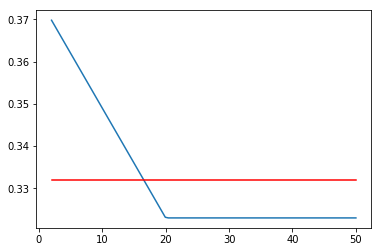

ValueError: operands could not be broadcast together with shapes (100,) (7,) 

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
T0 = 20
T_diff = T0 - T

def M(T, T0, A, beta, B):
    return where(T < T0, (A*(T0 - T)**beta) + B, B)

def g(T, T0, A, beta, B):
    """Represents the vector function g derived from a Lorentzian for nonlinear least-squares fitting."""
    #x, y = data
    g1 = np.sum((M(T, T0, A, beta, B) - y) * (beta * A *(T0 - T)**(beta - 1)))
    g2 = np.sum((M(T, T0, A, beta, B) - y) * (T0 - T)**beta)
    g3 = np.sum((M(T, T0, A, beta, B) - y) * (A*np.log(T0 - T) * (T0 - T)**beta))
    g4 = 0
    return g1, g2, g3, g4
#?curve_fit
x_data = np.linspace(2,50,100)
y_data = M(x_data,20,.0026,1, .323)
popt, pcov = curve_fit(M, x_data,y_data)
print(popt)

x_new = np.linspace(2,50,1000)
plot(x_data,y_data)
plot(x_new, M(x_new,*popt),'r')
plt.show()

popt2, pcov2 = curve_fit(g, x_data, y_data)
print(popt2)

x_new = np.linspace(2, 50., 500)
plt.plot(x_data, y_data, 'bo')
plt.plot(x_new, g(x_new, *popt2), 'r')
plt.show()
#plot(x_data, g(x_data, *popt))

## Writing this up as a report (due Sunday 24 February)

Refer to the instructions on QM+. For this report I would like to see all sections: Introduction, Methods, Results, Discussion, and Conclusions. Think carefully about your results and explain them in a way that doesn't assume your reader is an expert in the science or the code.

As a start for your references, in addition to the paper on this material referenced above, you might like to refer to two very early reports of antiferromagnetic neutron diffraction in manganese oxide, MnO [[2](https://journals.aps.org/pr/pdf/10.1103/PhysRev.76.1256.2), [3](https://journals.aps.org/pr/pdf/10.1103/PhysRev.83.333)] (*Note these may be available only on campus or via the QMUL library.) These are complicated papers and difficult to read, so I recommend primarily looking at the figures. In the second, fuller paper, figures 4 and 6 show the magnetic diffraction peaks disappearing as the temperature is raised while figure 7 shows the intensity as a function of temperature. This should look similar to your own results!

I don't expect a lot of references, but it would be good to give a hint of the scientific context, and you may also want to refer, say, to the documentation for the Python functions you use.

[2.00e+01 2.60e-03 1.00e+00 3.23e-01]
[0.375      0.37368687 0.37237374 0.37106061 0.36974747 0.36843434
 0.36712121 0.36580808 0.36449495 0.36318182 0.36186869 0.36055556
 0.35924242 0.35792929 0.35661616 0.35530303 0.3539899  0.35267677
 0.35136364 0.35005051 0.34873737 0.34742424 0.34611111 0.34479798
 0.34348485 0.34217172 0.34085859 0.33954545 0.33823232 0.33691919
 0.33560606 0.33429293 0.3329798  0.33166667 0.33035354 0.3290404
 0.32772727 0.32641414 0.32510101 0.32378788 0.323      0.323
 0.323      0.323      0.323      0.323      0.323      0.323
 0.323      0.323      0.323      0.323      0.323      0.323
 0.323      0.323      0.323      0.323      0.323      0.323
 0.323      0.323      0.323      0.323      0.323      0.323
 0.323      0.323      0.323      0.323      0.323      0.323
 0.323      0.323      0.323      0.323      0.323      0.323
 0.323      0.323      0.323      0.323      0.323      0.323
 0.323      0.323      0.323      0.323      0.323      0.323
 0.

J:\Physics\Teaching\spa5666\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in power
  """


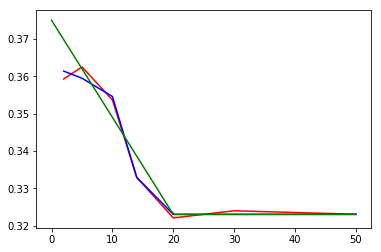

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
def M(T, T0, A, beta, B):
    return where(T < T0, (A*(T0 - T)**beta) + B, B)
C = np.array([2,5,10,14,20,30,50])
x_data = np.linspace(0,50,100)
y_data = M(np.linspace(0,50,100),20.,.0026,1,.323)
p0 = [20.,.0026,1,.323]
k,l = curve_fit(M, C, y, p0)
k2,l2 = curve_fit(M, x_data,M(x_data, *p0) , p0)
print(k2)
print(M(x_data,*k2))
plot(x,y,'r')
plot(C, M(C,*k), 'b')
plot(x_data,M(x_data,*k2), 'g')
